In [28]:
#Importing necessary libraries for generating recommendations and similar edges(copurchased items)

import string
import re
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *
from stemming.porter2 import stem
import networkx
#import nltk
#nltk.download('stopwords')
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayalipisal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# RECOMMENDATIONS

import networkx
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib as mpl

In [30]:
# Read the data from the amazon-books.txt to populate amazonProducts nested dictionary
# key = ASIN; 
# value = MetaData associated with ASIN

fhr = open('amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip()
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['Copurchased'] = cell[5].strip()
    MetaData['SalesRank'] = int(cell[6].strip())
    MetaData['TotalReviews'] = int(cell[7].strip())
    MetaData['AvgRating'] = float(cell[8].strip())
    MetaData['DegreeCentrality'] = int(cell[9].strip())
    MetaData['ClusteringCoeff'] = float(cell[10].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

In [31]:
# Read the data from amazon-books-copurchase.edgelist and assign it to copurchaseGraph weighted Graph;
# node = ASIN; 
# edge = copurchase 
# edge weight = category similarity

fhr = open("amazon-books-copurchase.edgelist", "rb")
copurchaseGraph = networkx.read_weighted_edgelist(fhr)
fhr.close()

In [36]:
# Recommendation done for a particular book 
print("Recommendations for Book with the ID:")
print("\n------------------------------------------------------------")

purchasedAsin = '0671727737'

Recommendations for Book with the ID:

------------------------------------------------------------


In [37]:
# Metadata associated with the book

print("ASIN = ", purchasedAsin)
print("Title = ", amazonBooks[purchasedAsin]['Title'])
print("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])

ASIN =  0671727737
Title =  The Eagle Has Landed
SalesRank =  841921
TotalReviews =  46
AvgRating =  4.5
DegreeCentrality =  5
ClusteringCoeff =  0.9


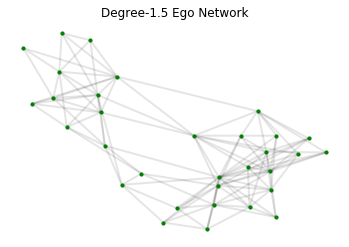

<Figure size 432x288 with 0 Axes>

In [39]:
# Implementing the depth-1 ego network of purchasedAsin from copurchaseGraph

n = purchasedAsin
ego = networkx.ego_graph(copurchaseGraph, n, radius=5)
purchasedAsinEgoGraph = networkx.Graph(ego)
pos = networkx.layout.spring_layout(purchasedAsinEgoGraph)
M = purchasedAsinEgoGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoGraph, pos, node_size=10, node_color='green')
edges = networkx.draw_networkx_edges(purchasedAsinEgoGraph, pos, node_size=10, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1.5 Ego Network')
plt.figure(0)
plt.show()

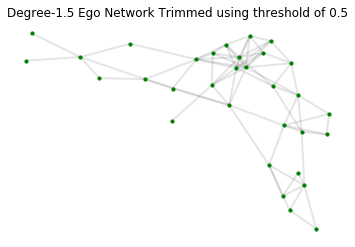

In [40]:
# Island method on purchasedAsinEgoGraph to retain edges with Threshold >= 0.5
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f,t,e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t, weight=e['weight'])
pos = networkx.layout.spring_layout(purchasedAsinEgoTrimGraph)
M = purchasedAsinEgoTrimGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos, node_size=10, node_color='green', label=True)
edges = networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph, pos, node_size=10, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1.5 Ego Network Trimmed using threshold of 0.5')
plt.figure(1)
plt.show()
